
# Project: Investigate a Dataset - [No-Show-Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This data set (No-Show-Appointments was chosen for the investigate datasets. it consists of 14 coulumns and 110527 rows gotten from the code df.shape having no null values. The columns include 

1) Appointment Id

2) Gender - Indicates if the person is a  male por a female

3) Scheduled Day - Indicates the dy the appointmment was set

4) Appointment Day

5) Age - Indicates the age of the patient 

6) Neighbourhood - Indicates the location of the hospital 

7) Scholarship

8) Hipertension (Which was later renamed to Hypertension)

9) Diabetes

10) Alcoholism

11) Handcap ( Which was later renamed as Handicap)

12) Sms_Received 

13) No- Show 

14) Patient Id

### Question(s) for Analysis
Below are the questions posed on the dataset given. 

**Question 1 What is the most common disesse among people scheduled for appointment?**
An attempt to know the most likely disease that patients scheduled for appointment have. 
 
**Question 2: Which Gender is more committed to attending appointments?**
Due to the popolation as regards gender, the analyst hopes to show which of the gender is more commited to attending appointments that the other.

**Question 3: What is the proportion of patient that showed up for appointment to those that didnt show up?**

**Question 4: What is the proportion of patient with scholarship?**

**Question 5: Does Scholarship affect appointment?**
A very important question to pose as  availability of scholarship may or may not be the reason for missing appointments. This can be determined through visualization. 




In [1]:
#importing Libraries and loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading datasets
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## Data Wrangling

In [3]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# using th f-sring in conjunction with df.shape to show the size of the dataframe
df.shape
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 110527 rows and 14 columns


The dataset above has 110527 rows and 14 columns. Are there values for all the rows and columns and are they having the right data format in terms of datatype. 

This can be determined by assessing the data programmaticall using python assessing functions like info(), head(), describe(), to assess the dataset and piont out data consistency errors or errors in formatting.

1. Checking for missing values

2. Assessing data format

3. Checking and removing unnecessary columns

4. Renaming columns where appropriate. 

5. Checking for duplicates

In [5]:
# Exploring data to check for errors in data format or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Getting a summary statistic on all the data set numerical columns 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicates in the dataset')

There are 0 duplicates in the dataset


From the output above
1. None of the columns have missing values and dataset contains 0 duplicates. 

2. Some Columns are mispelt (Hipertension, Handcap)

3. No-show column seems a bit confusing and would have to be restructured appropriately

4. From the questions set above, not all columns would be needed for analysis of the dataset

5. outliers are seen in the age columns. 

In [8]:
#Renaming columns
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
# renaming 'no-show' to 'show' to aid understanding
df.rename(columns = {'No-show' : 'Show'}, inplace = True)

# writing anonymous function to sawp 'No' to 1 and 'Yes' to 0
# 1 meaning the patient showed up
# 0 meaning they did not show

swap = lambda x : 0  if x == 'Yes' else 1

df['Show'] = df['Show'].map(lambda x : 0  if x == 'Yes' else 1)

#checking to see changes was properly implemented

df['Show'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: Show, dtype: int64

In [10]:
# Selecting columns to aid analysis 
df = df[['Gender',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Show']]
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


This Dataset cntains 0 duplicates and zero null values 

## Exploratory Data Analysis

## Question 1  What is the most common disease among people scheduled for appointment?

**Getting the Proportion of each disease to compare with each other**

In [11]:
# a function that calculates  the percentages of all diseases and returns the actual percentage
def percent(x):
     y = x.value_counts()[1]/len(x) * 100
    
     return y

In [12]:
Hypertension = percent(df['Hypertension'])
Handicap = percent(df['Handicap'])
Alcoholism = percent(df['Alcoholism'])
Diabetes = percent(df['Diabetes'])

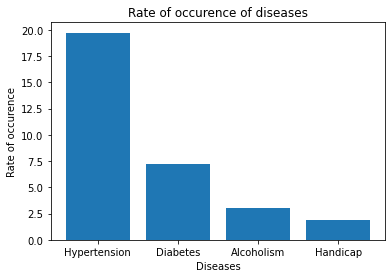

In [13]:
location = [1,2,3,4] 
Height = [Hypertension, Diabetes, Alcoholism, Handicap]
labels =['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
label = ['Diabetes', 'Alcoholism', 'Handicap', 'Hypertension']
plt.bar(location,Height)
plt.xlabel('Diseases')
plt.ylabel('Rate of occurence')
plt.title('Rate of occurence of diseases')
plt.xticks(location, labels);

**The graph above shows that hypertension is the disease that occurs most than other diseases. It is the most common disease that has appointments scheduled. **

## Question 2: Which Gender is more committed to attending appointments?

**Getting the count of male and female that showed up for appointment**


In [14]:
# getting the count of male and female that showed up for appointment
gender_show_count = df.groupby('Gender')['Show'].value_counts()
gender_show_count

Gender  Show
F       1       57246
        0       14594
M       1       30962
        0        7725
Name: Show, dtype: int64

In [15]:
#getting the count of male and female that showed up for appointment.
gender_show_count[[2,0]]

Gender  Show
M       1       30962
F       1       57246
Name: Show, dtype: int64

In [16]:
#getting the total sum of patients that showed up for their appointment
df['Show'].value_counts()

1    88208
0    22319
Name: Show, dtype: int64

In [17]:
# the proportion of female pateints that showed up for their appointment
Female = gender_show_count[[2,0]][1]/df['Show'].value_counts()[1]
Female

0.6489887538545257

In [18]:
# the proportion of male pateints that showed up for their appointment

Male = gender_show_count[[2,0]][0]/df['Show'].value_counts()[1]
Male

0.35101124614547435

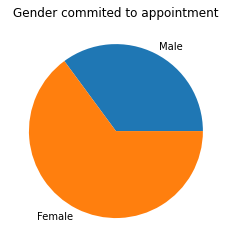

In [19]:
#plotting a pie chart to show the proportion of gender in regards to showing up for appointment. 
Height = [Male, Female]
labels =['Male', 'Female']
plt.pie(Height, labels = labels)
plt.title('Gender commited to appointment');

**From the diagram above, it is clear that females are more committed to showing up for appointment than males **

 ## Question 3: What is the proportion of patient that showed up for appointment to those that didnt show up?

In [20]:
# Getting the sum total of appointment show or no_show
df['Show'].value_counts()

1    88208
0    22319
Name: Show, dtype: int64

In [21]:
show_up = df['Show'].value_counts()[1]/len(df['Show'])
show_up

0.798067440534892

In [22]:
no_show_up = df['Show'].value_counts()[0]/len(df['Show'])
no_show_up

0.20193255946510807

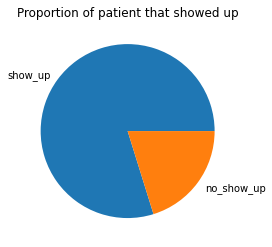

In [23]:
location = [1,2] 
Height = [show_up, no_show_up]
labels =['show_up', 'no_show_up']
plt.pie(Height, labels=labels)
plt.title('Proportion of patient that showed up');

**From the diagram above, it is quite clear patients that show up for appointments are more than those that don't. **

 ## Question 4: What is the proportion of patient with scholarship?

In [24]:
# getting the total number of patient with and without  scholarship
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [25]:
no_scholarship = df['Scholarship'].value_counts()[0]
scholarship = df['Scholarship'].value_counts()[1]

In [26]:
# calculating the mean no-scholarship s to get the proportion 
no_scholarship/ df['Scholarship'].shape[0]

0.9017344178345562

In [27]:
# calculating the mean scholarship to get the proportion 

scholarship/ df['Scholarship'].shape[0]

0.09826558216544373

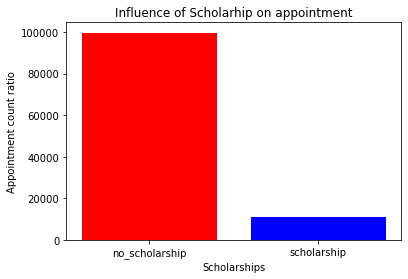

In [28]:
#plotting a bar chart to show proportion of appointment to scholarship
location = [1, 2] 
Height = [no_scholarship, scholarship]
labels =['no_scholarship', 'scholarship']
plt.bar(location,Height, color = ['r', 'b'])
plt.xlabel('Scholarships')
plt.ylabel('Appointment count ratio')
plt.title('Influence of Scholarhip on appointment')
plt.xticks(location, labels);

**From the graph above, it shows that patients with no scholarship are more than patients with scholarship **

## Question 5: Does Scholarship affect appointment?

In [29]:
# Performing a groupby to get the know how many patient with scholarship showed up and vice versa
group = df.groupby('Scholarship')['Show'].value_counts()
group

Scholarship  Show
0            1       79925
             0       19741
1            1        8283
             0        2578
Name: Show, dtype: int64

In [30]:
# extravcting the count of patient with no scholarship but showed up for appointment
no_scholarship_show = group[0,1]
no_scholarship_show

79925

In [31]:
#gettint the total count of patient without scholarship
no_scholarship = df['Scholarship'].value_counts()[0]
no_scholarship 

99666

In [32]:
#proportion of patient without scholarship but showed up 
no_scholarship_show_prop = no_scholarship_show/ no_scholarship
no_scholarship_show_prop

0.8019284409929164

In [33]:
# extracting the count of patient with scholarship and showed up for appointment
scholarship_show = group[1,1]
scholarship_show

8283

In [34]:
#getting the total count of patient with scholarship 
scholarship = df['Scholarship'].value_counts()[1]
scholarship

10861

In [35]:
#proportion of patient with scholarship and showed up 
scholarship_show_prop = scholarship_show / scholarship
scholarship_show_prop

0.7626369579228433

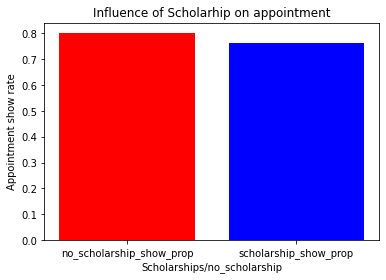

In [36]:
#plotting a bar chart to show proportion of appointment to scholarship
location = [1, 2] 
Height = [no_scholarship_show_prop, scholarship_show_prop]
labels =['no_scholarship_show_prop', 'scholarship_show_prop']
plt.bar(location,Height, color = ['r', 'b'])
plt.xlabel('Scholarships/no_scholarship')
plt.ylabel('Appointment show rate')
plt.title('Influence of Scholarhip on appointment')
plt.xticks(location, labels);

**From the chart above, availability of scholarship does not have a significant effect on appointment **

## Conclusion

**Question 1 What is the most common disesse among people scheduled for appointment?**

Hypertension is the disease that occurs most than other diseases. It is the most common disease that has appointments scheduled.

**Question 2: Which Gender is more committed to attending appointments?**

Females are more committed to showing up for appointment than males.

**Question 3: What is the proportion of patient that showed up for appointment to those that didnt show up?**

Patients that show up for appointments are more than those that don't.

**Question 4: What is the proportion of patient with scholarship?**

Patients with no scholarship are more than patients with scholarship

**Question 5: Does Scholarship affect appointment?**

Availability of scholarship does not have a significant effect on appointment



## Limitations

From the dataset given, it appears that some patients with no illness were still scheduled for appointmnets which i believe will affect the analysis. 
This exploration also didn't take into account the effect of neighbourhood, and the difference time between scheduled day and appointment day at the percentage of showing up of patients for their appointment.